In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bikes = pd.read_csv('../data/availability.csv')
df_bikes['time_stamp'] = pd.to_datetime(df_bikes['time_stamp']).dt.round('H')
df_bikes = df_bikes.groupby(['id', 'time_stamp']).agg({'bikes': 'mean', 'bike_stands': 'mean'}).reset_index()

In [3]:
def round_nearest(value):
    integer_part = int(value)
    fractional_part = value - integer_part
    if fractional_part >= 0.5:
        return integer_part + 1
    else:
        return integer_part

In [4]:
df_bikes['bikes'] = df_bikes['bikes'].apply(lambda x: round_nearest(x))
df_bikes['bike_stands'] = df_bikes['bike_stands'].apply(lambda x: round_nearest(x))

In [5]:
df_bikes.head()

,id,time_stamp,bikes,bike_stands
0,1,2024-01-01 00:00:00,23,8
1,1,2024-01-01 01:00:00,23,8
2,1,2024-01-01 02:00:00,23,8
3,1,2024-01-01 03:00:00,23,8
4,1,2024-01-01 04:00:00,23,8


In [6]:
len(df_bikes)

164160

In [7]:
df_weather = pd.read_csv('../data/hourlyWeather.csv')
df_weather['time_stamp'] = pd.to_datetime(df_weather['time_stamp']).dt.round('H')

In [8]:
df_weather.head()

,time_stamp,temp_c,feelslike_c,wind_kph,humidity,precip_mm,gust_kph,wind_degree,pressure_mb,cloud,uv
0,2024-01-01 00:00:00,5.8,1.1,30.1,84.33,0.078,50.0,257,994.4,64.9,0
1,2024-01-01 01:00:00,5.0,0.1,29.9,86.73,0.000,68.8,257,994.8,25.0,0
2,2024-01-01 02:00:00,4.8,-0.1,28.5,83.05,0.000,48.2,257,995.5,17.2,0
3,2024-01-01 03:00:00,4.5,0.0,24.0,83.87,0.000,42.5,254,996.4,17.3,0
4,2024-01-01 04:00:00,4.7,0.5,22.3,82.67,0.000,61.6,240,997.2,17.2,0


In [9]:
len(df_weather) * 114

164160

In [10]:
df = pd.merge(df_bikes, df_weather, on='time_stamp', how='inner')
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df.head()

,id,time_stamp,bikes,bike_stands,temp_c,feelslike_c,wind_kph,humidity,precip_mm,gust_kph,wind_degree,pressure_mb,cloud,uv
0,1,2024-01-01 00:00:00,23,8,5.8,1.1,30.1,84.33,0.078,50.0,257,994.4,64.9,0
1,1,2024-01-01 01:00:00,23,8,5.0,0.1,29.9,86.73,0.000,68.8,257,994.8,25.0,0
2,1,2024-01-01 02:00:00,23,8,4.8,-0.1,28.5,83.05,0.000,48.2,257,995.5,17.2,0
3,1,2024-01-01 03:00:00,23,8,4.5,0.0,24.0,83.87,0.000,42.5,254,996.4,17.3,0
4,1,2024-01-01 04:00:00,23,8,4.7,0.5,22.3,82.67,0.000,61.6,240,997.2,17.2,0


In [11]:
df = df[df['id']  == 1]
df = df.drop('id', axis=1)
df = df.drop('time_stamp', axis=1)

In [12]:
df.to_csv('../data/statistics.csv', index=False)

In [13]:
X = df[['temp_c', 'feelslike_c', 'wind_kph', 'humidity', 'precip_mm', 'gust_kph', 'wind_degree', 'pressure_mb', 'cloud', 'uv']]
y = df[['bikes', 'bike_stands']]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 0 to 1438
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temp_c       1439 non-null   float64
 1   feelslike_c  1439 non-null   float64
 2   wind_kph     1439 non-null   float64
 3   humidity     1439 non-null   float64
 4   precip_mm    1439 non-null   float64
 5   gust_kph     1439 non-null   float64
 6   wind_degree  1439 non-null   int64  
 7   pressure_mb  1439 non-null   float64
 8   cloud        1439 non-null   float64
 9   uv           1439 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 123.7 KB


In [15]:
X.describe()

,temp_c,feelslike_c,wind_kph,humidity,precip_mm,gust_kph,wind_degree,pressure_mb,cloud,uv
count,1439.000000,1439.000000,1439.000000,1439.00000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,6.169771,3.334121,19.412370,84.51237,0.068663,33.738290,214.427380,1010.533843,71.605351,0.276581
std,3.749789,5.011930,8.237808,8.88634,0.506181,16.685841,72.529866,16.611274,26.108703,0.665001
min,-5.000000,-10.500000,3.400000,56.11000,0.000000,2.200000,1.000000,973.100000,0.800000,0.000000
25%,3.700000,-0.150000,13.500000,78.19000,0.000000,20.200000,199.500000,999.200000,54.100000,0.000000
50%,6.100000,2.800000,18.200000,86.10000,0.000000,32.800000,234.000000,1012.800000,86.400000,0.000000
75%,9.000000,6.250000,24.200000,91.85500,0.000000,45.400000,257.000000,1023.600000,89.100000,0.000000
max,14.000000,14.000000,56.100000,99.98000,9.810000,97.500000,356.000000,1042.500000,100.000000,5.000000


In [16]:
temperature_df = df[['bikes', 'bike_stands', 'temp_c']].copy()
temperature_df['temp_c'] = temperature_df['temp_c'].round().astype(int)
temperature_df = temperature_df.groupby('temp_c').mean().reset_index()
temperature_df['bikes'] = temperature_df['bikes'].apply(lambda x: round_nearest(x))
temperature_df['bike_stands'] = temperature_df['bike_stands'].apply(lambda x: round_nearest(x))
temperature_df.head()

,temp_c,bikes,bike_stands
0,-5,1,31
1,-4,3,28
2,-3,10,22
3,-2,9,22
4,-1,5,26


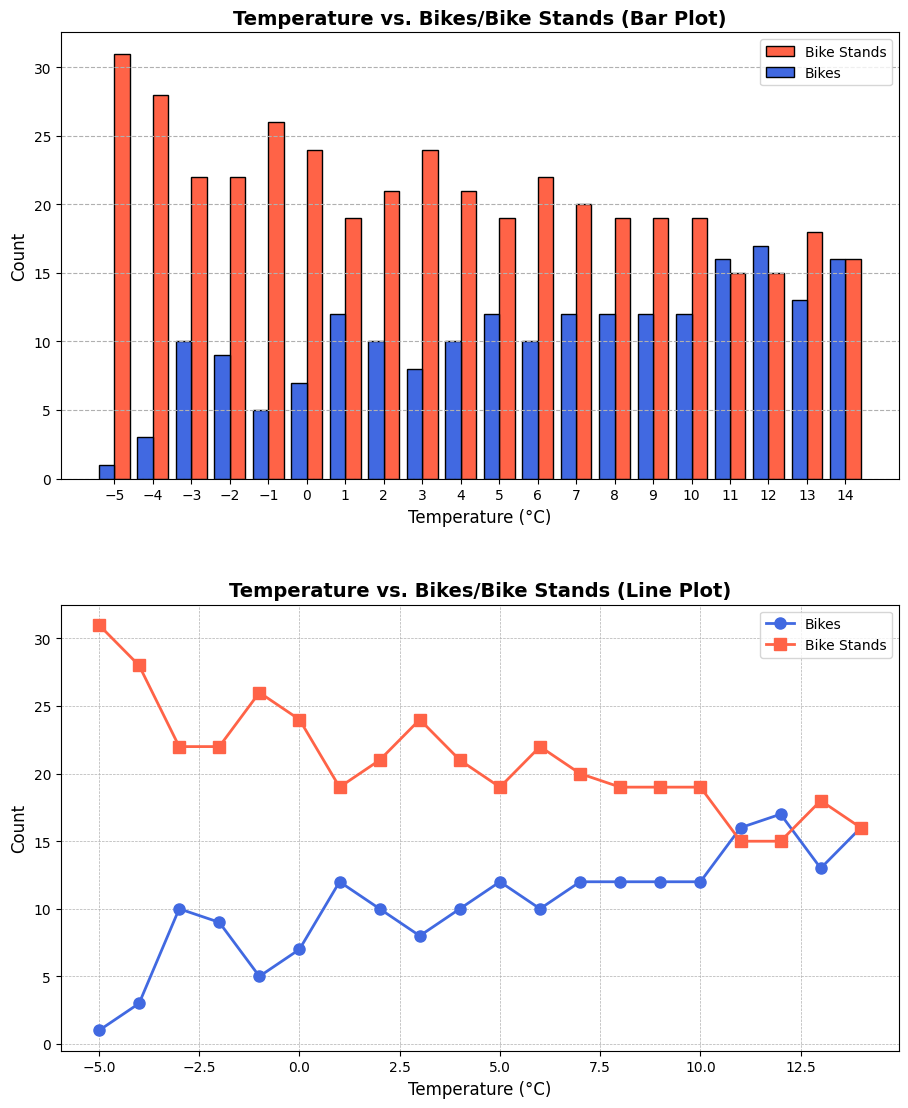

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].bar(temperature_df['temp_c'] + 0.2, temperature_df['bike_stands'], width=0.4, label='Bike Stands', color='tomato', edgecolor='black')
axs[0].bar(temperature_df['temp_c'] - 0.2, temperature_df['bikes'], width=0.4, label='Bikes', color='royalblue', edgecolor='black')
axs[0].set_title('Temperature vs. Bikes/Bike Stands (Bar Plot)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Temperature (°C)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(temperature_df['temp_c'])
axs[0].legend()
axs[0].grid(axis='y', linestyle='--')

axs[1].plot(temperature_df['temp_c'], temperature_df['bikes'], label='Bikes', marker='o', markersize=8, linestyle='-', linewidth=2, color='royalblue')
axs[1].plot(temperature_df['temp_c'], temperature_df['bike_stands'], label='Bike Stands', marker='s', markersize=8, linestyle='-', linewidth=2, color='tomato')
axs[1].set_title('Temperature vs. Bikes/Bike Stands (Line Plot)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=4.0)
plt.show()

In [18]:
feelslike_df = df[['bikes', 'bike_stands', 'feelslike_c']].copy()
feelslike_df['feelslike_c'] = feelslike_df['feelslike_c'].round().astype(int)
feelslike_df = feelslike_df.groupby('feelslike_c').mean().reset_index()
feelslike_df['bikes'] = feelslike_df['bikes'].apply(lambda x: round_nearest(x))
feelslike_df['bike_stands'] = feelslike_df['bike_stands'].apply(lambda x: round_nearest(x))
feelslike_df.head()

,feelslike_c,bikes,bike_stands
0,-10,1,31
1,-9,2,30
2,-8,7,24
3,-7,10,21
4,-6,4,27


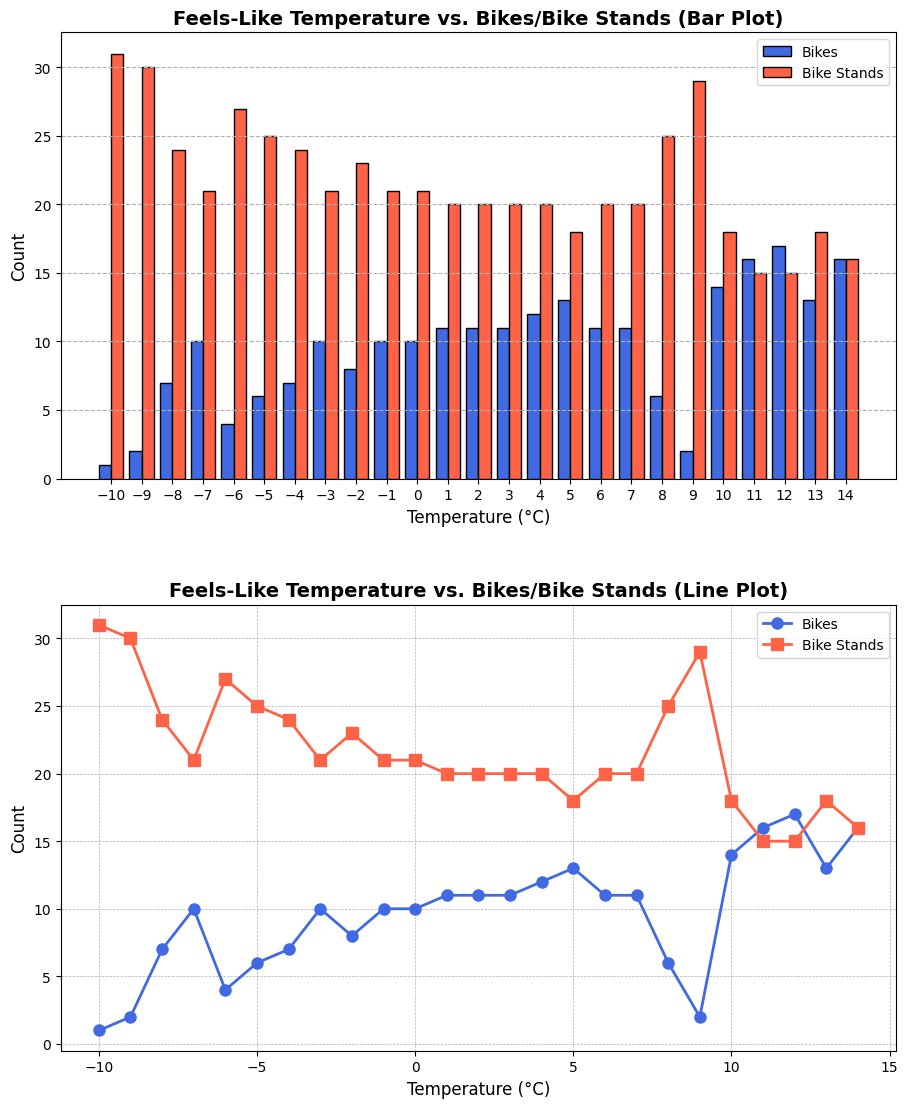

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 Rows, 1 Column

axs[0].bar(feelslike_df['feelslike_c'] - 0.2, feelslike_df['bikes'], width=0.4, label='Bikes', color='royalblue', edgecolor='black')
axs[0].bar(feelslike_df['feelslike_c'] + 0.2, feelslike_df['bike_stands'], width=0.4, label='Bike Stands', color='tomato', edgecolor='black')
axs[0].set_title('Feels-Like Temperature vs. Bikes/Bike Stands (Bar Plot)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Temperature (°C)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(feelslike_df['feelslike_c'])
axs[0].legend()
axs[0].grid(axis='y', linestyle='--')

axs[1].plot(feelslike_df['feelslike_c'], feelslike_df['bikes'], label='Bikes', marker='o', markersize=8, linestyle='-', linewidth=2, color='royalblue')
axs[1].plot(feelslike_df['feelslike_c'], feelslike_df['bike_stands'], label='Bike Stands', marker='s', markersize=8, linestyle='-', linewidth=2, color='tomato')
axs[1].set_title('Feels-Like Temperature vs. Bikes/Bike Stands (Line Plot)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Temperature (°C)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=4.0)
plt.show()

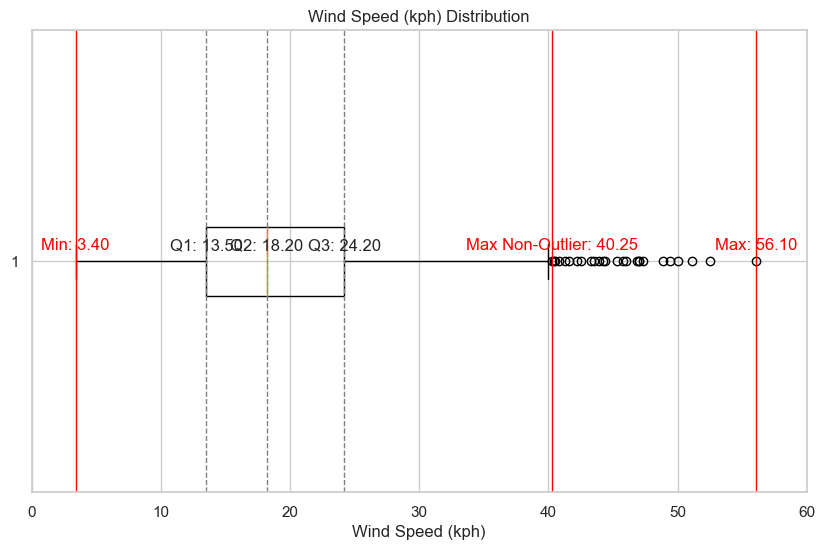

In [37]:
quartiles = df['wind_kph'].quantile([0.25, 0.5, 0.75])
min_value = df['wind_kph'].min()
max_value = df['wind_kph'].max()
max_non_outlier_value = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])

plt.figure(figsize=(10, 6))
plt.boxplot(df['wind_kph'], vert=False)
plt.xlim(0, 60)

for q in quartiles:
    plt.axvline(q, linestyle='--', color='gray', linewidth=1)

for val, label in zip([min_value, max_value, max_non_outlier_value], ['Min', 'Max', 'Max Non-Outlier']):
    plt.axvline(val, linestyle='-', color='red', linewidth=1)
    plt.text(val, 1.05, f'{label}: {val:.2f}', verticalalignment='top', horizontalalignment='center', color='red')

for i, q in enumerate(quartiles):
    plt.text(q, 1.05, f'Q{i + 1}: {q:.2f}', verticalalignment='top', horizontalalignment='center')

plt.title('Wind Speed (kph) Distribution')
plt.xlabel('Wind Speed (kph)')
plt.show()


In [56]:
wind_df = df[['wind_kph', 'bikes', 'bike_stands']].copy()
bins = [0, 3.4, 13.5, 18.2, 24.2, 40.25, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme'] 
wind_df['wind_kph'] = pd.cut(wind_df['wind_kph'], bins=bins, labels=labels, include_lowest=True)
wind_df = wind_df.groupby('wind_kph').mean().reset_index()
wind_df['bikes'] = wind_df['bikes'].apply(lambda x: round_nearest(x))
wind_df['bike_stands'] = wind_df['bike_stands'].apply(lambda x: round_nearest(x))
wind_df.head()

,wind_kph,bikes,bike_stands
0,Very Low,6,25
1,Low,10,21
2,Moderate,9,22
3,High,12,19
4,Very High,13,18


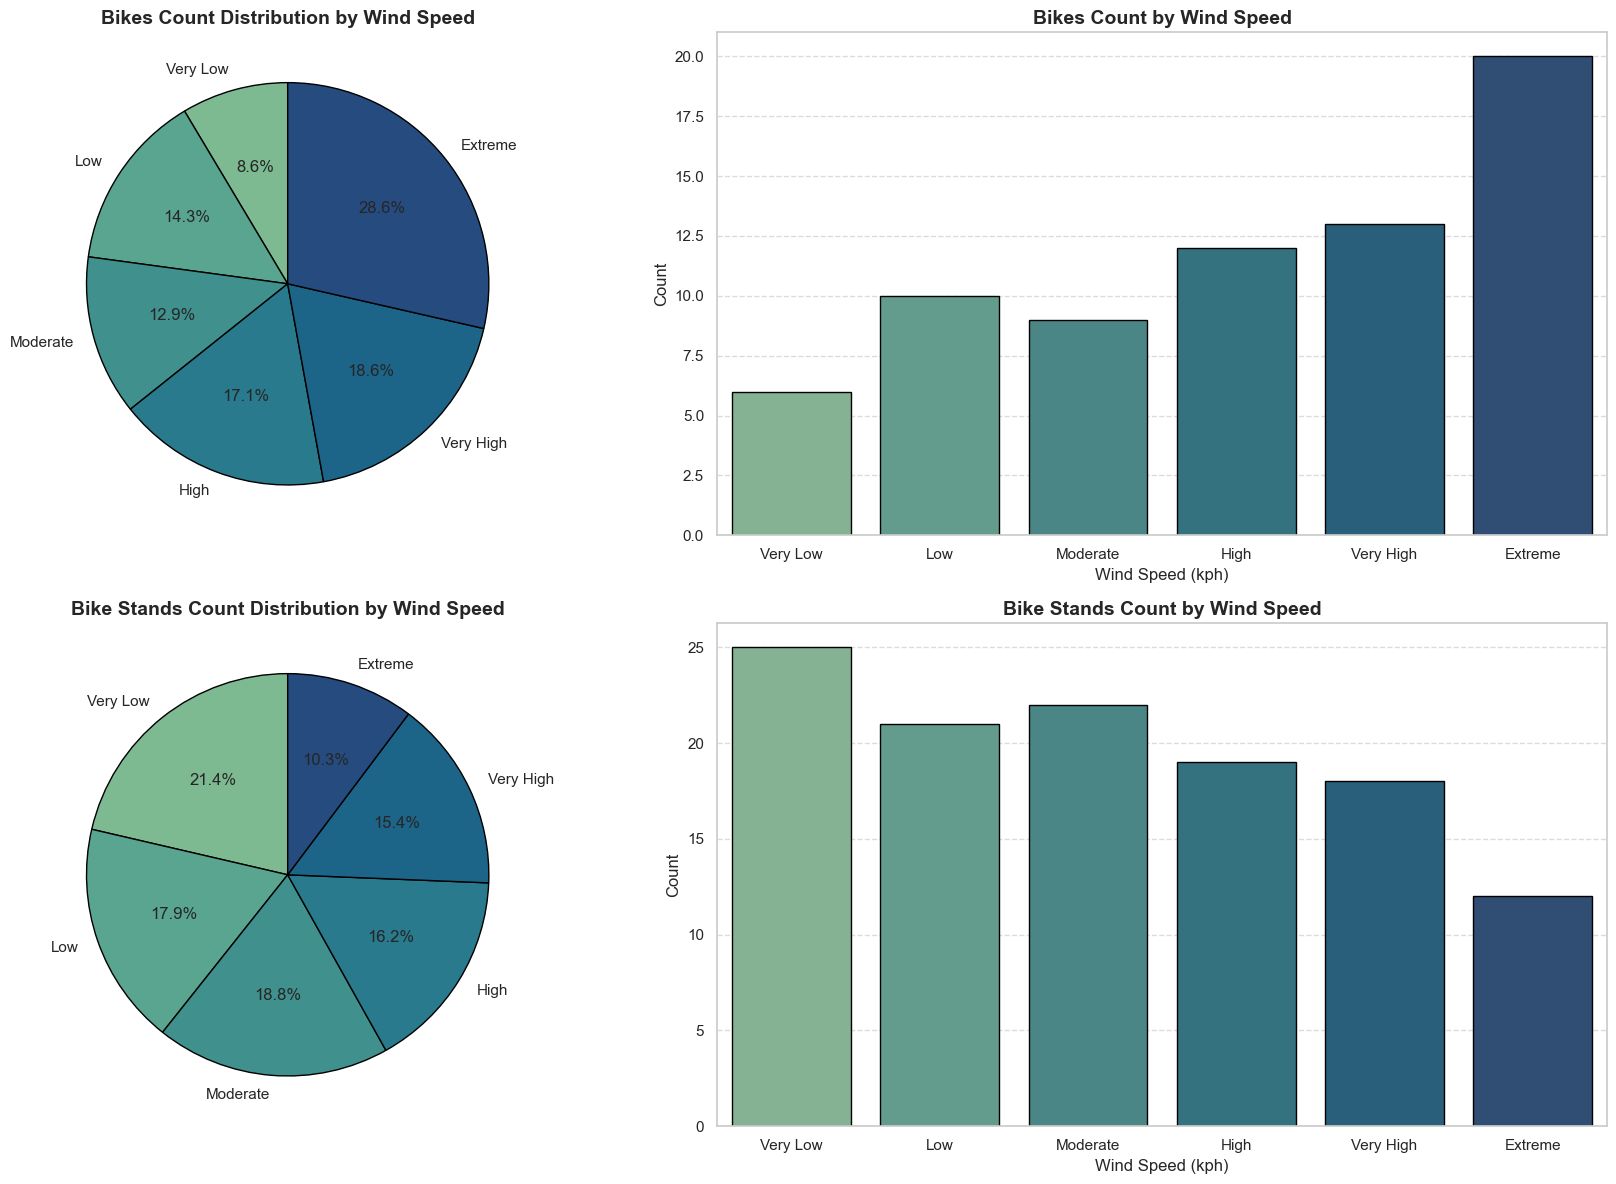

In [57]:
wind_kph_categories = wind_df['wind_kph'].unique()
bikes_count = wind_df['bikes'].values
bike_stands_count = wind_df['bike_stands'].values

fig, axes = plt.subplots(2, 2, figsize=(18, 12), dpi=100)
palette = sns.color_palette("crest", n_colors=len(wind_kph_categories))

axes[0, 0].pie(bikes_count, labels=wind_kph_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('Bikes Count Distribution by Wind Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[0, 1], x=wind_kph_categories, y=bikes_count, palette=palette, edgecolor='black')
axes[0, 1].set_title('Bikes Count by Wind Speed', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Wind Speed (kph)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

axes[1, 0].pie(bike_stands_count, labels=wind_kph_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('Bike Stands Count Distribution by Wind Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[1, 1], x=wind_kph_categories, y=bike_stands_count, palette=palette, edgecolor='black')
axes[1, 1].set_title('Bike Stands Count by Wind Speed', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Wind Speed (kph)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

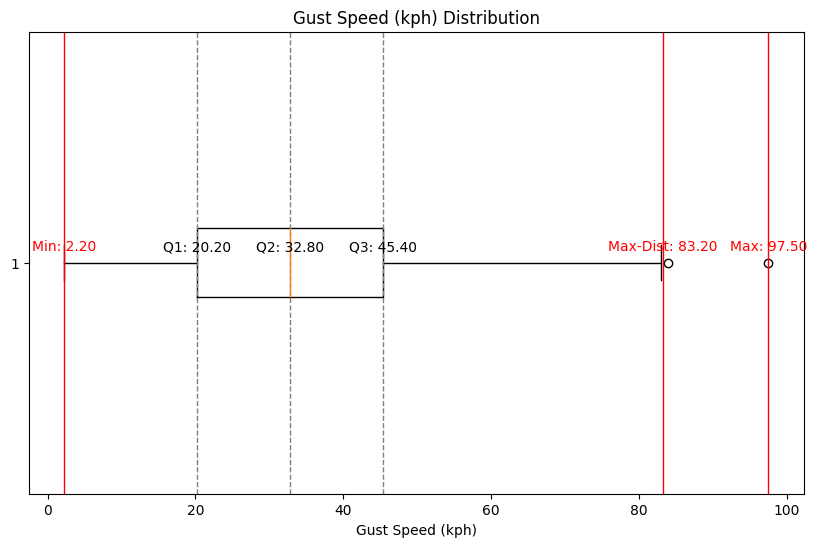

In [23]:
quartiles = df['gust_kph'].quantile([0.25, 0.5, 0.75])
min_value = df['gust_kph'].min()
max_value = df['gust_kph'].max()
max_non_outlier_value = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])

plt.figure(figsize=(10, 6))
plt.boxplot(df['gust_kph'], vert=False)

for q in quartiles:
    plt.axvline(q, linestyle='--', color='gray', linewidth=1)

for val, label in zip([min_value, max_value, max_non_outlier_value], ['Min', 'Max', 'Max-Dist']):
    plt.axvline(val, linestyle='-', color='red', linewidth=1)
    plt.text(val, 1.05, f'{label}: {val:.2f}', verticalalignment='top', horizontalalignment='center', color='red')

for i, q in enumerate(quartiles):
    plt.text(q, 1.05, f'Q{i + 1}: {q:.2f}', verticalalignment='top', horizontalalignment='center')

plt.title('Gust Speed (kph) Distribution')
plt.xlabel('Gust Speed (kph)')
plt.show()

In [24]:
gust_df = df[['gust_kph', 'bikes', 'bike_stands']].copy()
bins = [0, 2.20, 20.20, 32.80, 45.40, 83.20, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme'] 
gust_df['gust_kph'] = pd.cut(gust_df['gust_kph'], bins=bins, labels=labels, include_lowest=True)
gust_df = gust_df.groupby('gust_kph').mean().reset_index()
gust_df['bikes'] = gust_df['bikes'].apply(lambda x: round_nearest(x))
gust_df['bike_stands'] = gust_df['bike_stands'].apply(lambda x: round_nearest(x))
gust_df.head()

,gust_kph,bikes,bike_stands
0,Very Low,23,8
1,Low,10,21
2,Moderate,9,22
3,High,12,19
4,Very High,14,17


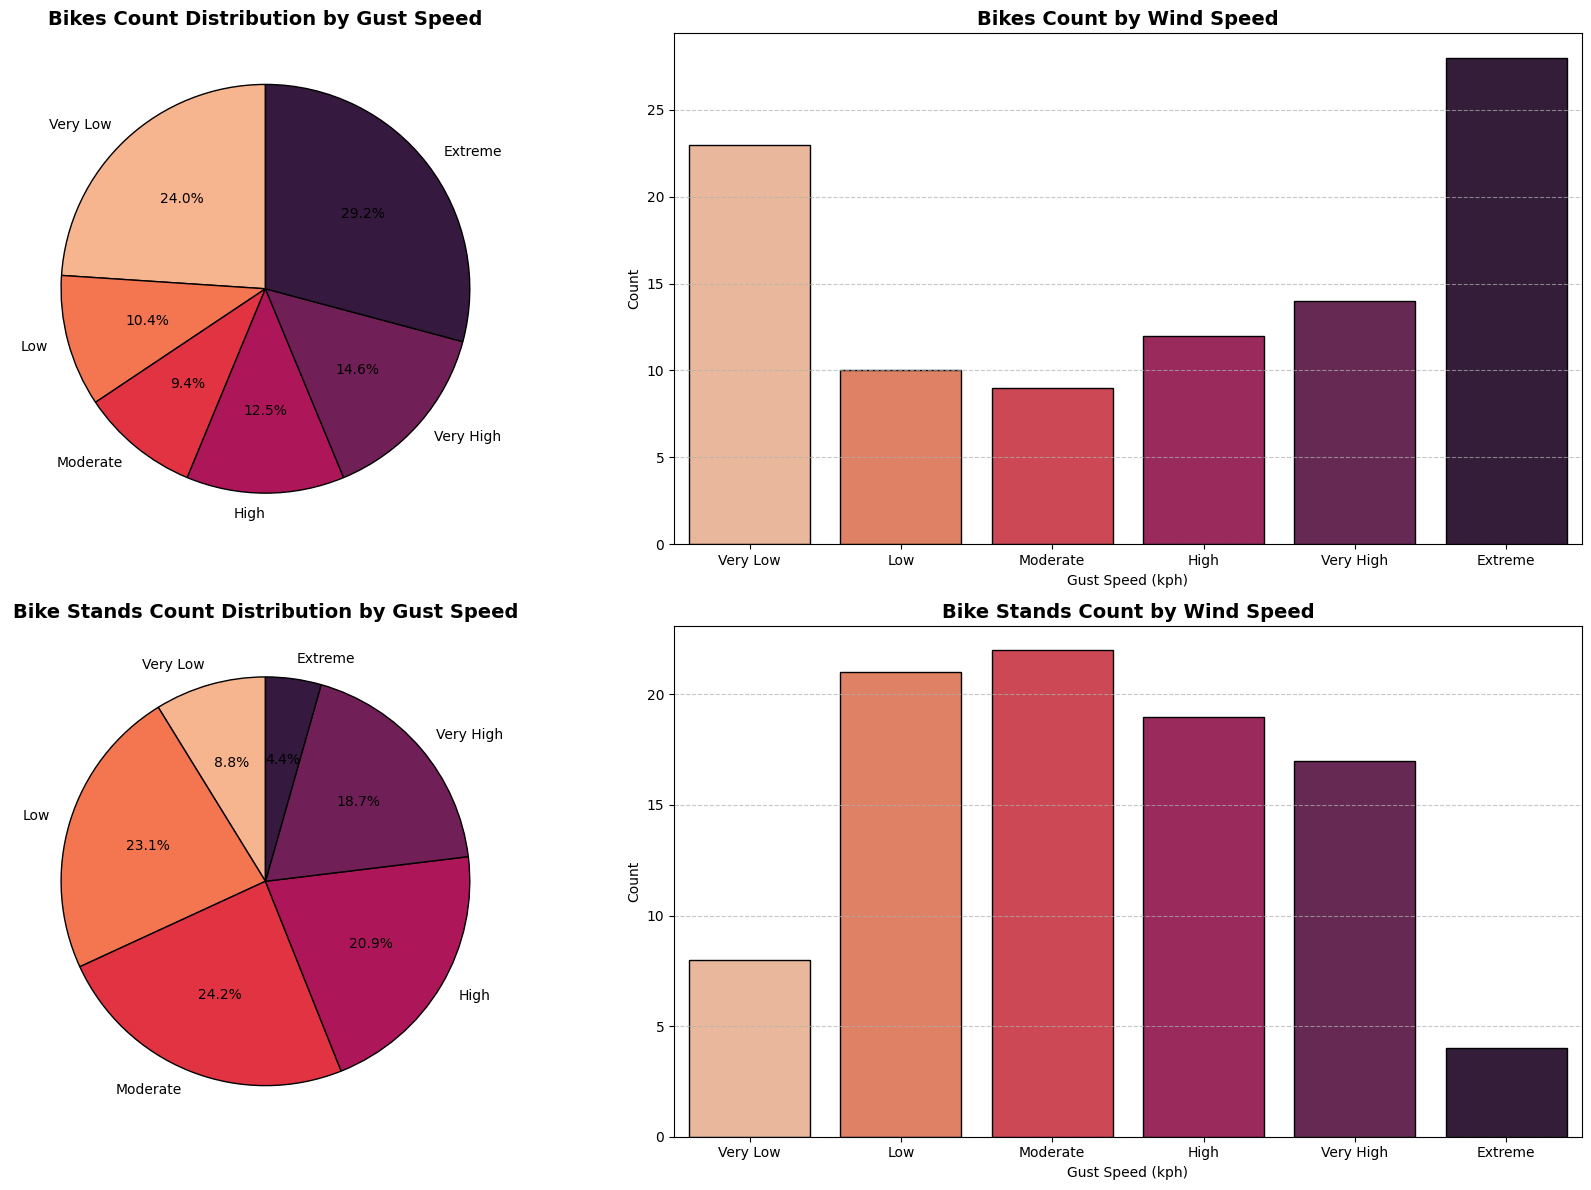

In [25]:
gust_kph_categories = gust_df['gust_kph'].unique()
bikes_count = gust_df['bikes'].values
bike_stands_count = gust_df['bike_stands'].values

fig, axes = plt.subplots(2, 2, figsize=(18, 12), dpi=100)
palette = sns.color_palette("rocket_r", n_colors=len(gust_kph_categories))

axes[0, 0].pie(bikes_count, labels=gust_kph_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('Bikes Count Distribution by Gust Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[0, 1], x=gust_kph_categories, y=bikes_count, palette=palette, edgecolor='black')
axes[0, 1].set_title('Bikes Count by Wind Speed', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gust Speed (kph)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

axes[1, 0].pie(bike_stands_count, labels=gust_kph_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('Bike Stands Count Distribution by Gust Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[1, 1], x=gust_kph_categories, y=bike_stands_count, palette=palette, edgecolor='black')
axes[1, 1].set_title('Bike Stands Count by Wind Speed', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gust Speed (kph)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

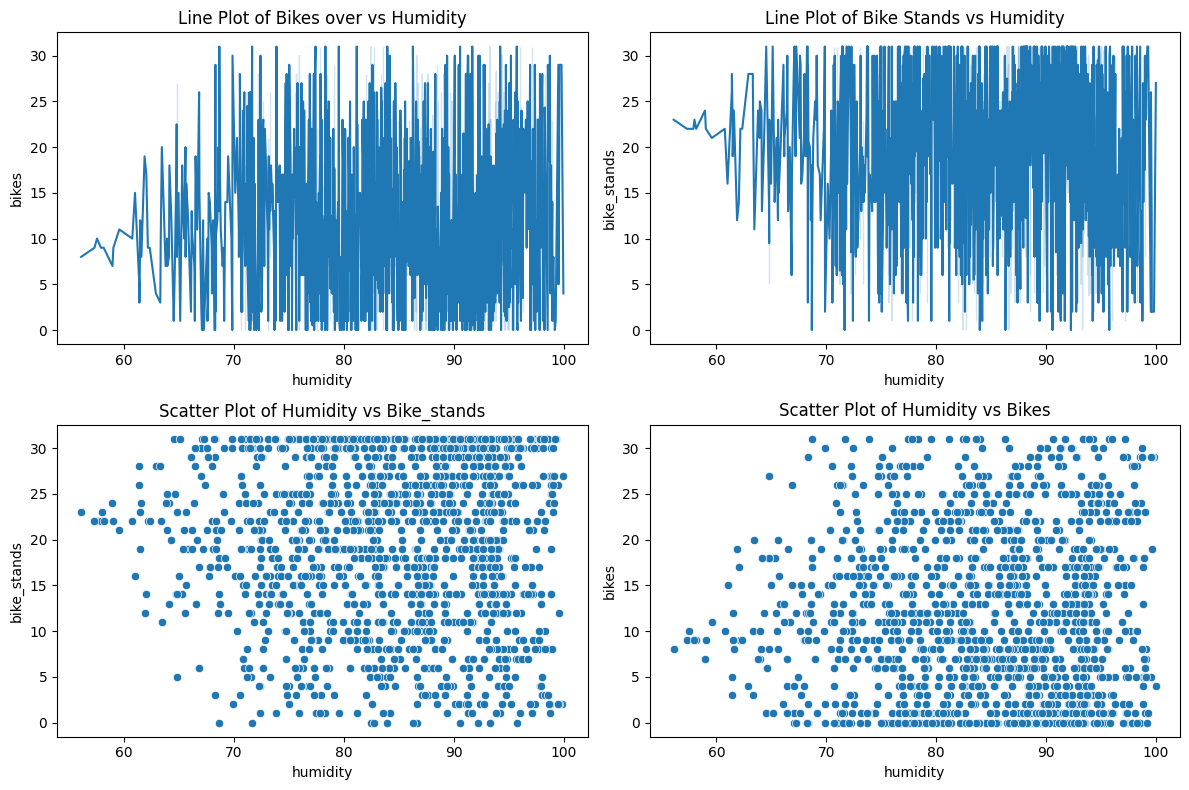

In [26]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='humidity', y='bikes')
plt.title('Line Plot of Bikes over vs Humidity')

# Bar Plot
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='humidity', y='bike_stands')
plt.title('Line Plot of Bike Stands vs Humidity')

# Histogram
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='humidity', y='bike_stands')
plt.title('Scatter Plot of Humidity vs Bike_stands')

# Scatter Plot
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='humidity', y='bikes')
plt.title('Scatter Plot of Humidity vs Bikes')

plt.tight_layout()
plt.show()


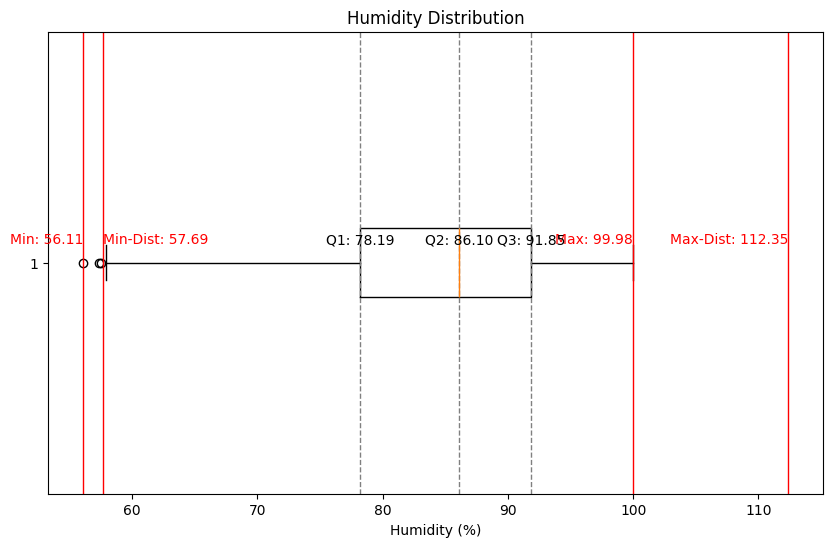

In [27]:
quartiles = df['humidity'].quantile([0.25, 0.5, 0.75])
min_value = df['humidity'].min()
max_value = df['humidity'].max()
IQR = quartiles[0.75] - quartiles[0.25]
max_non_outlier_value = quartiles[0.75] + 1.5 * IQR
min_non_outlier_value = quartiles[0.25] - 1.5 * IQR

plt.figure(figsize=(10, 6))
plt.boxplot(df['humidity'], vert=False)

for q in quartiles:
    plt.axvline(q, linestyle='--', color='gray', linewidth=1)

for val, label in zip([min_value, max_value, max_non_outlier_value, min_non_outlier_value], 
                      ['Min', 'Max', 'Max-Dist', 'Min-Dist']):
    plt.axvline(val, linestyle='-', color='red', linewidth=1)
    plt.text(val, 1.05, f'{label}: {val:.2f}', verticalalignment='center', horizontalalignment='left' if label == 'Min-Dist' else 'right', color='red')

for i, q in enumerate(quartiles):
    plt.text(q, 1.05, f'Q{i + 1}: {q:.2f}', verticalalignment='center', horizontalalignment='center')

plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()


In [28]:
humidity_df = df[['humidity', 'bikes', 'bike_stands']].copy()
bins = [0, 57.69, 78.19, 86.10, 91.85, 99.9, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme'] 
humidity_df['humidity'] = pd.cut(humidity_df['humidity'], bins=bins, labels=labels, include_lowest=True)
humidity_df = humidity_df.groupby('humidity').mean().reset_index()
humidity_df['bikes'] = humidity_df['bikes'].apply(lambda x: round_nearest(x))
humidity_df['bike_stands'] = humidity_df['bike_stands'].apply(lambda x: round_nearest(x))
humidity_df.head()

,humidity,bikes,bike_stands
0,Very Low,9,22
1,Low,12,19
2,Moderate,11,20
3,High,11,21
4,Very High,12,20


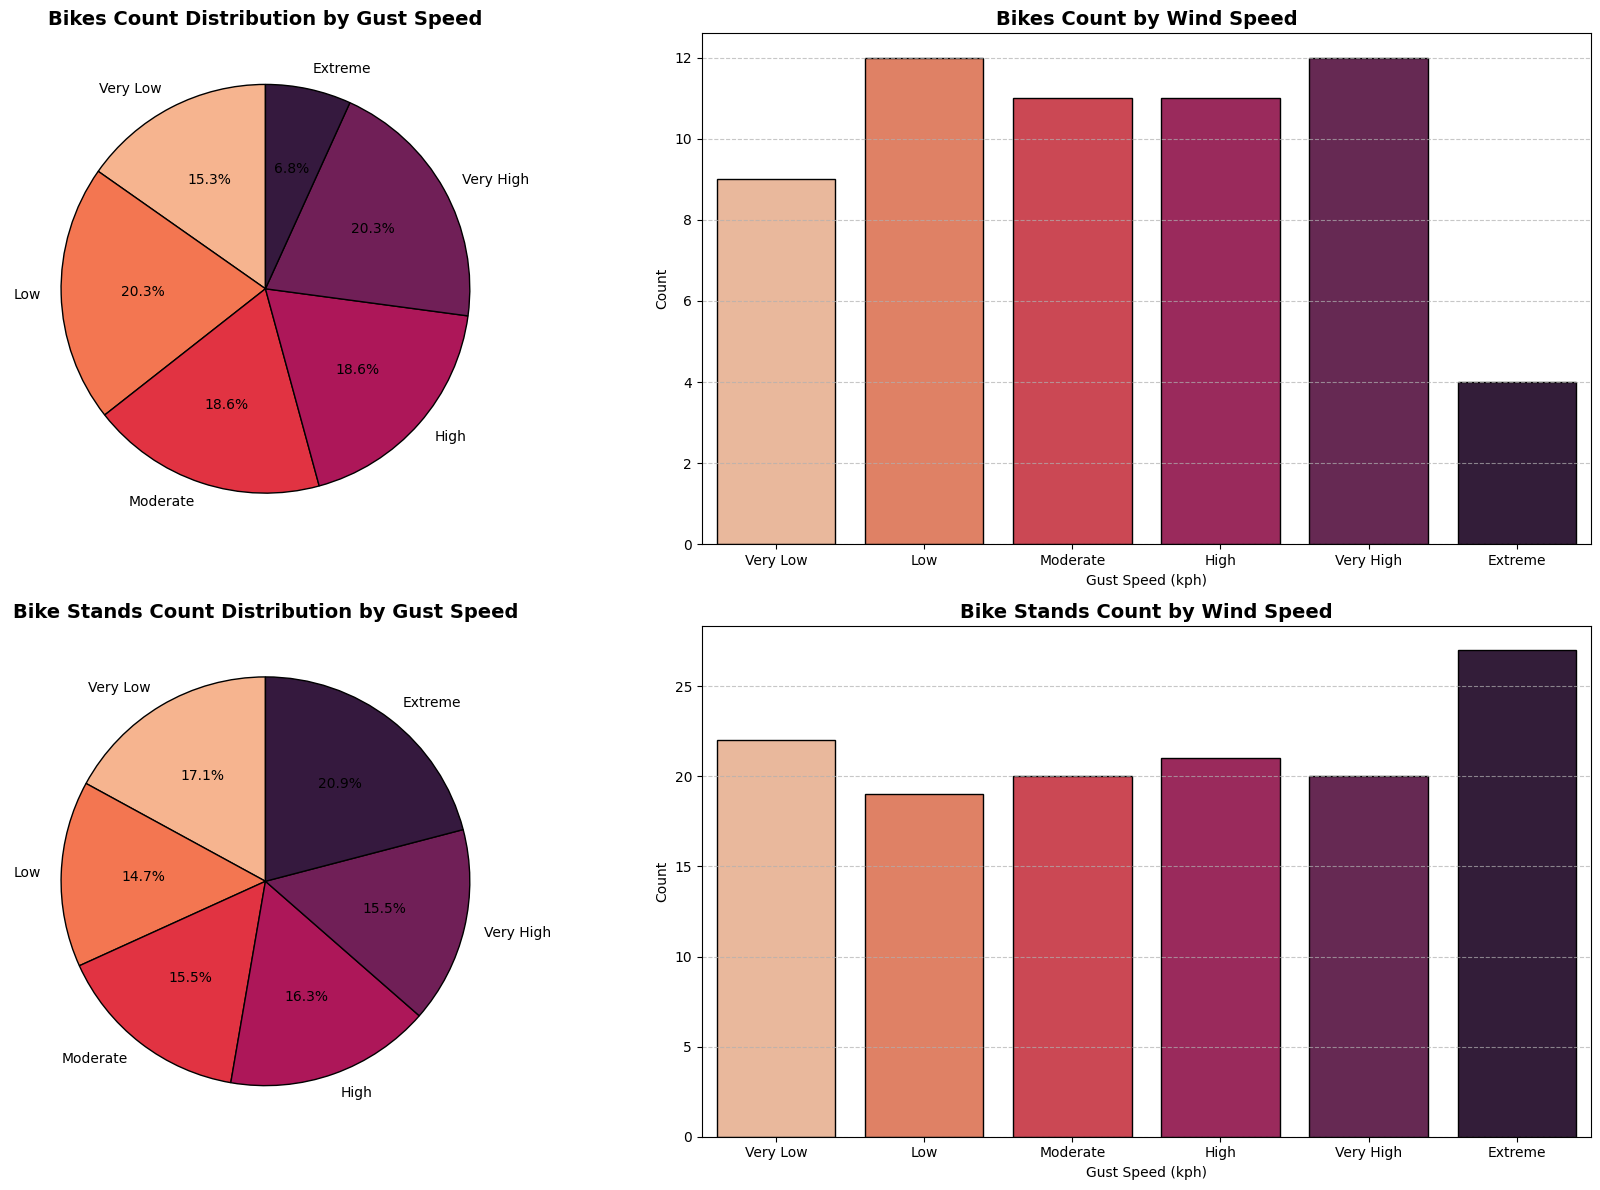

In [29]:
humidity_categories = humidity_df['humidity'].unique()
bikes_count = humidity_df['bikes'].values
bike_stands_count = humidity_df['bike_stands'].values

fig, axes = plt.subplots(2, 2, figsize=(18, 12), dpi=100)
palette = sns.color_palette("rocket_r", n_colors=len(humidity_categories))

axes[0, 0].pie(bikes_count, labels=humidity_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[0, 0].set_title('Bikes Count Distribution by Gust Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[0, 1], x=humidity_categories, y=bikes_count, palette=palette, edgecolor='black')
axes[0, 1].set_title('Bikes Count by Wind Speed', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gust Speed (kph)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

axes[1, 0].pie(bike_stands_count, labels=humidity_categories, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('Bike Stands Count Distribution by Gust Speed', fontsize=14, fontweight='bold')

sns.barplot(ax=axes[1, 1], x=humidity_categories, y=bike_stands_count, palette=palette, edgecolor='black')
axes[1, 1].set_title('Bike Stands Count by Wind Speed', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gust Speed (kph)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

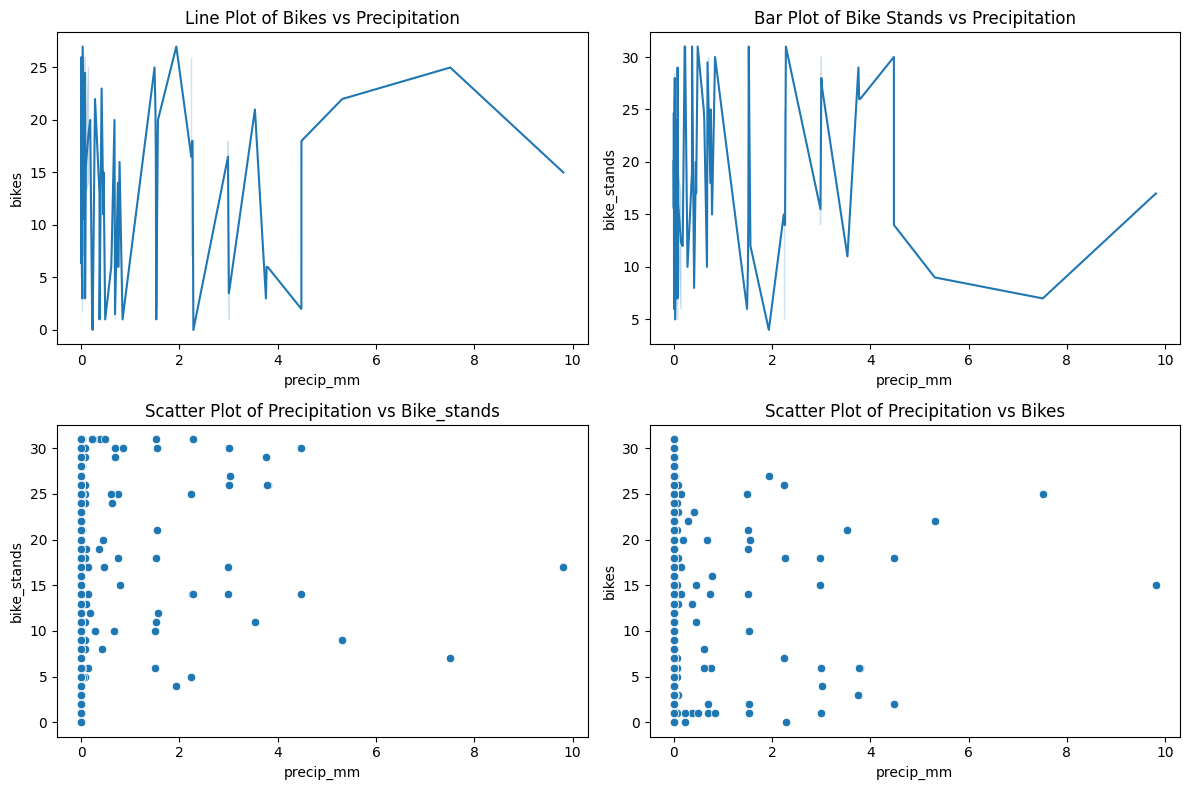

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='precip_mm', y='bikes')
plt.title('Line Plot of Bikes vs Precipitation')

plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='precip_mm', y='bike_stands')
plt.title('Bar Plot of Bike Stands vs Precipitation')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='precip_mm', y='bike_stands')
plt.title('Scatter Plot of Precipitation vs Bike_stands')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='precip_mm', y='bikes')
plt.title('Scatter Plot of Precipitation vs Bikes')

plt.tight_layout()
plt.show()

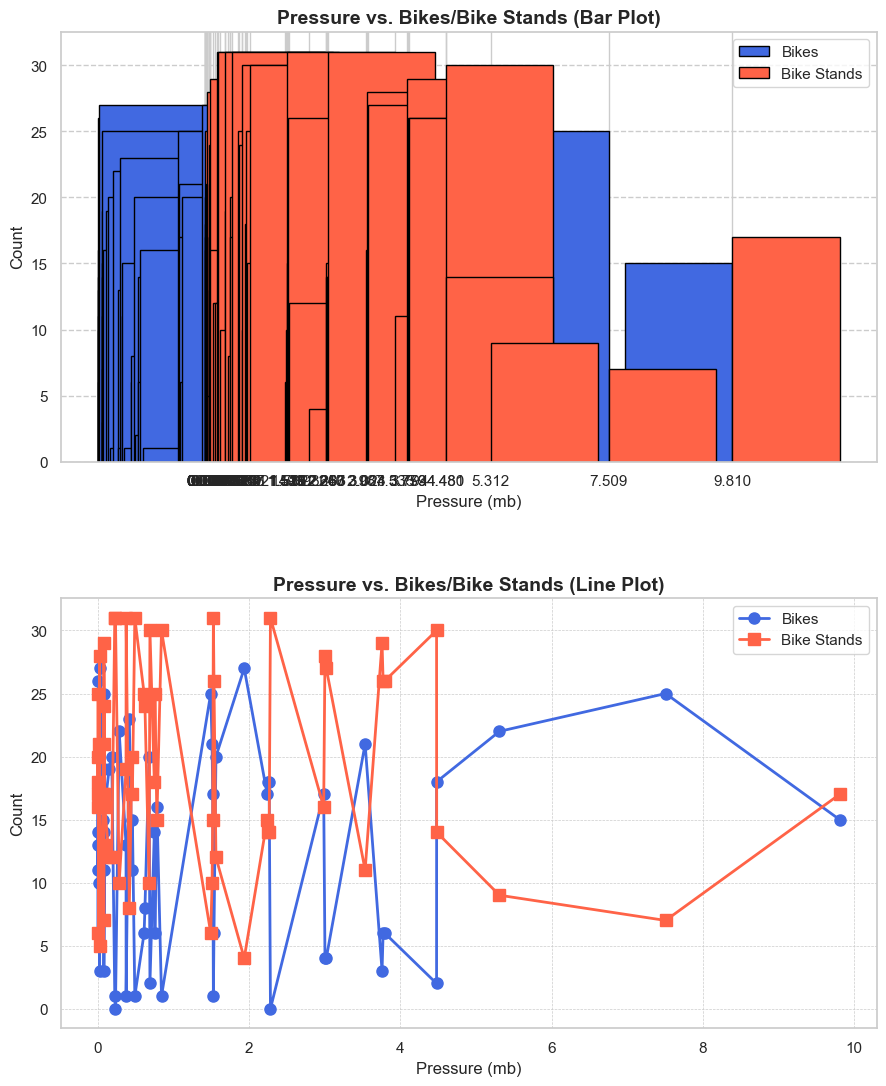

In [58]:
pressure_df = df[['precip_mm', 'bikes', 'bike_stands']].copy()
pressure_df = pressure_df.groupby('precip_mm').mean().reset_index()
pressure_df['bikes'] = pressure_df['bikes'].apply(lambda x: round_nearest(x))
pressure_df['bike_stands'] = pressure_df['bike_stands'].apply(lambda x: round_nearest(x))
pressure_df.head()

fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 Rows, 1 Column

axs[0].bar(pressure_df['precip_mm'] - 1, pressure_df['bikes'], width=2, label='Bikes', color='royalblue', edgecolor='black')
axs[0].bar(pressure_df['precip_mm'] + 1, pressure_df['bike_stands'], width=2, label='Bike Stands', color='tomato', edgecolor='black')
axs[0].set_title('Pressure vs. Bikes/Bike Stands (Bar Plot)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Pressure (mb)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(pressure_df['precip_mm'])
axs[0].legend()
axs[0].grid(axis='y', linestyle='--')

axs[1].plot(pressure_df['precip_mm'], pressure_df['bikes'], label='Bikes', marker='o', markersize=8, linestyle='-', linewidth=2, color='royalblue')
axs[1].plot(pressure_df['precip_mm'], pressure_df['bike_stands'], label='Bike Stands', marker='s', markersize=8, linestyle='-', linewidth=2, color='tomato')
axs[1].set_title('Pressure vs. Bikes/Bike Stands (Line Plot)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Pressure (mb)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=4.0)
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Precipitation vs Bike_stands')

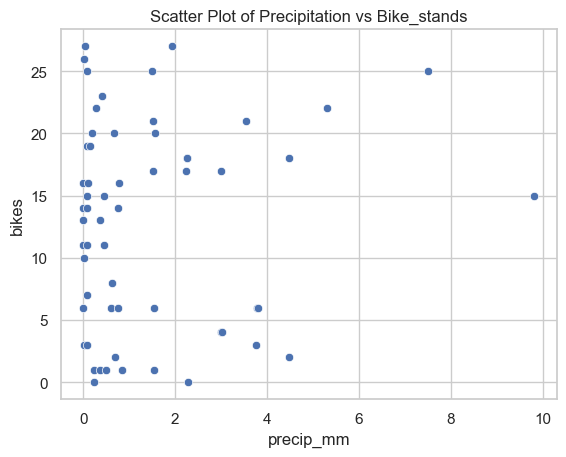

In [60]:
sns.scatterplot(data=pressure_df, x='precip_mm', y='bikes')
plt.title('Scatter Plot of Precipitation vs Bike_stands')

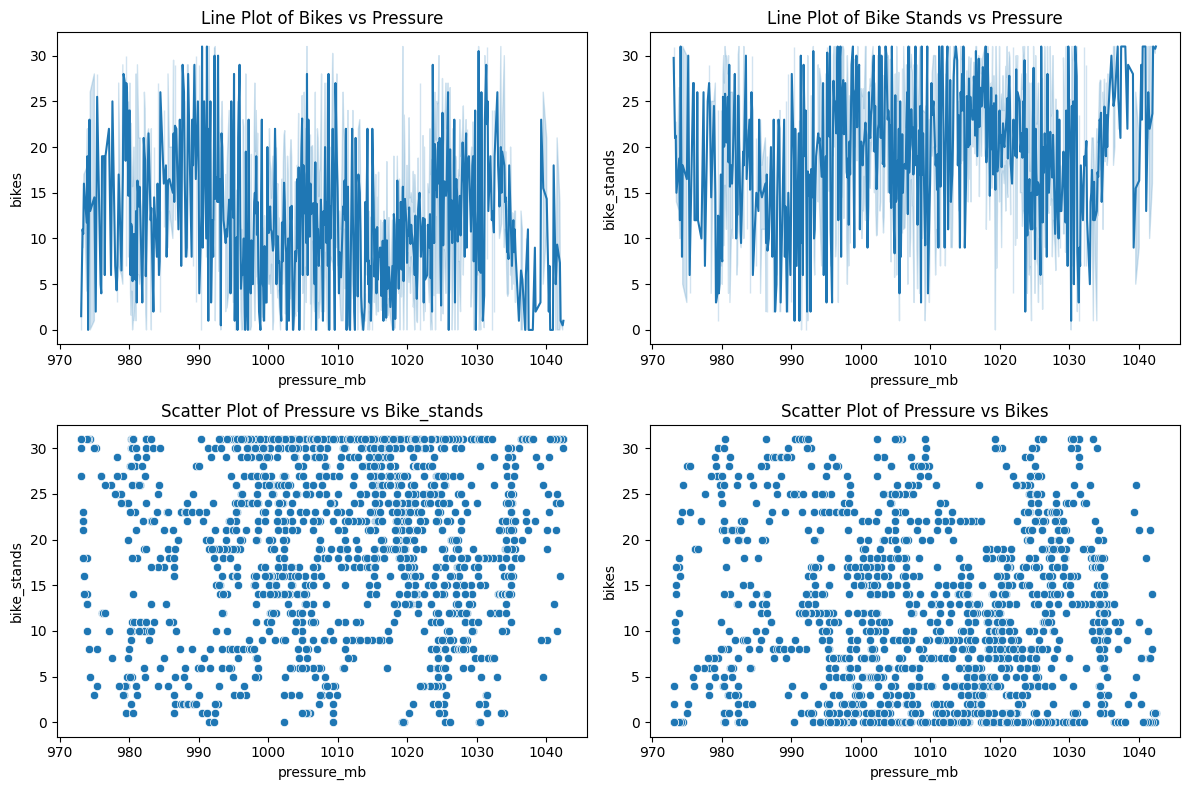

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='pressure_mb', y='bikes')
plt.title('Line Plot of Bikes vs Pressure')

plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='pressure_mb', y='bike_stands')
plt.title('Line Plot of Bike Stands vs Pressure')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='pressure_mb', y='bike_stands')
plt.title('Scatter Plot of Pressure vs Bike_stands')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='pressure_mb', y='bikes')
plt.title('Scatter Plot of Pressure vs Bikes')

plt.tight_layout()
plt.show()

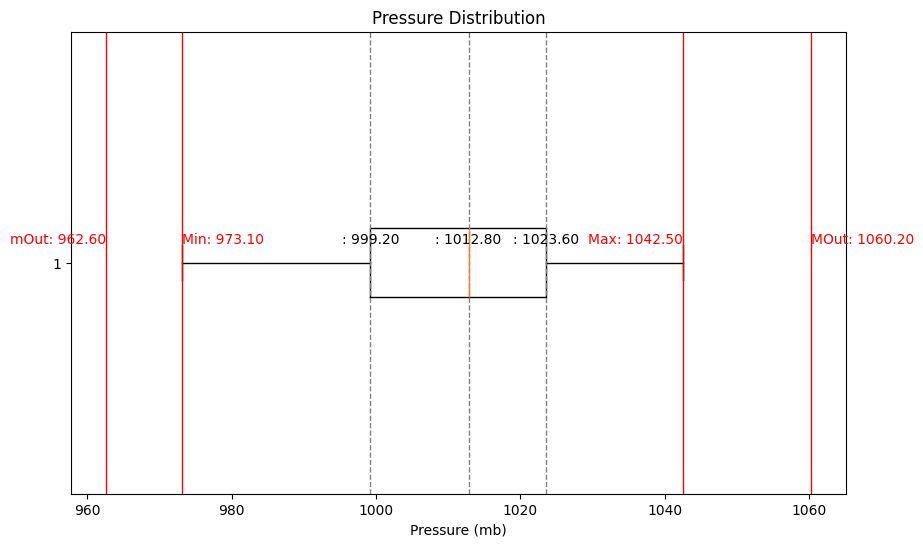

In [32]:
quartiles = df['pressure_mb'].quantile([0.25, 0.5, 0.75])
min_value = df['pressure_mb'].min()
max_value = df['pressure_mb'].max()
IQR = quartiles[0.75] - quartiles[0.25]
max_non_outlier_value = quartiles[0.75] + 1.5 * IQR
min_non_outlier_value = quartiles[0.25] - 1.5 * IQR

plt.figure(figsize=(10, 6))
plt.boxplot(df['pressure_mb'], vert=False)

for q in quartiles:
    plt.axvline(q, linestyle='--', color='gray', linewidth=1)

for val, label in zip([min_value, max_value, max_non_outlier_value, min_non_outlier_value], 
                      ['Min', 'Max', 'MOut', 'mOut']):
    plt.axvline(val, linestyle='-', color='red', linewidth=1)
    plt.text(val, 1.05, f'{label}: {val:.2f}', verticalalignment='center', horizontalalignment='left' if (label == 'MOut' or label == 'Min') else 'right', color='red')

for i, q in enumerate(quartiles):
    plt.text(q, 1.05, f': {q:.2f}', verticalalignment='center', horizontalalignment='center')

plt.title('Pressure Distribution')
plt.xlabel('Pressure (mb)')
plt.show()

In [33]:
pressure_df = df[['pressure_mb', 'bikes', 'bike_stands']].copy()
pressure_df['pressure_mb'] = pressure_df['pressure_mb'].round(-1)
pressure_df = pressure_df.groupby('pressure_mb').mean().reset_index()
pressure_df['bikes'] = pressure_df['bikes'].apply(lambda x: round_nearest(x))
pressure_df['bike_stands'] = pressure_df['bike_stands'].apply(lambda x: round_nearest(x))
pressure_df.head()

,pressure_mb,bikes,bike_stands
0,970.0,11,20
1,980.0,13,19
2,990.0,16,15
3,1000.0,11,21
4,1010.0,11,20


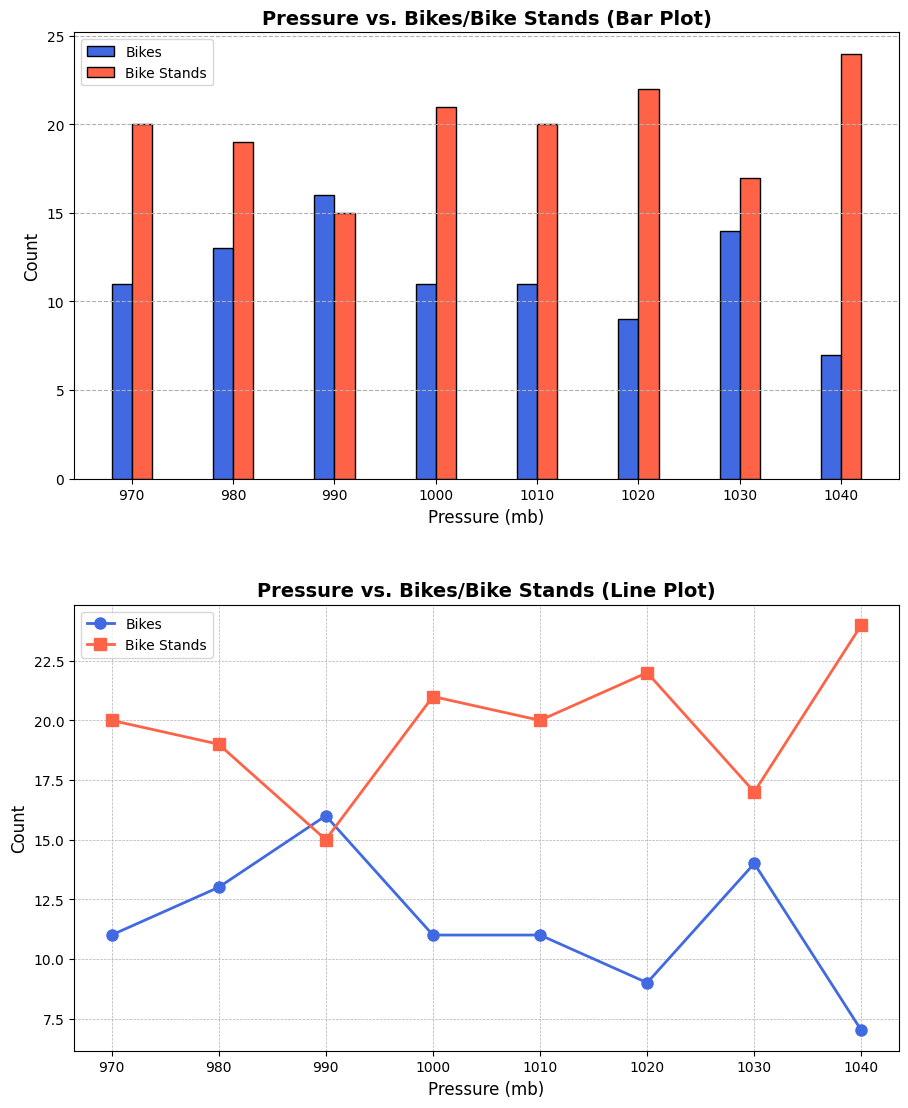

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))  # 2 Rows, 1 Column

axs[0].bar(pressure_df['pressure_mb'] - 1, pressure_df['bikes'], width=2, label='Bikes', color='royalblue', edgecolor='black')
axs[0].bar(pressure_df['pressure_mb'] + 1, pressure_df['bike_stands'], width=2, label='Bike Stands', color='tomato', edgecolor='black')
axs[0].set_title('Pressure vs. Bikes/Bike Stands (Bar Plot)', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Pressure (mb)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xticks(pressure_df['pressure_mb'])
axs[0].legend()
axs[0].grid(axis='y', linestyle='--')

axs[1].plot(pressure_df['pressure_mb'], pressure_df['bikes'], label='Bikes', marker='o', markersize=8, linestyle='-', linewidth=2, color='royalblue')
axs[1].plot(pressure_df['pressure_mb'], pressure_df['bike_stands'], label='Bike Stands', marker='s', markersize=8, linestyle='-', linewidth=2, color='tomato')
axs[1].set_title('Pressure vs. Bikes/Bike Stands (Line Plot)', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Pressure (mb)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=4.0)
plt.show()

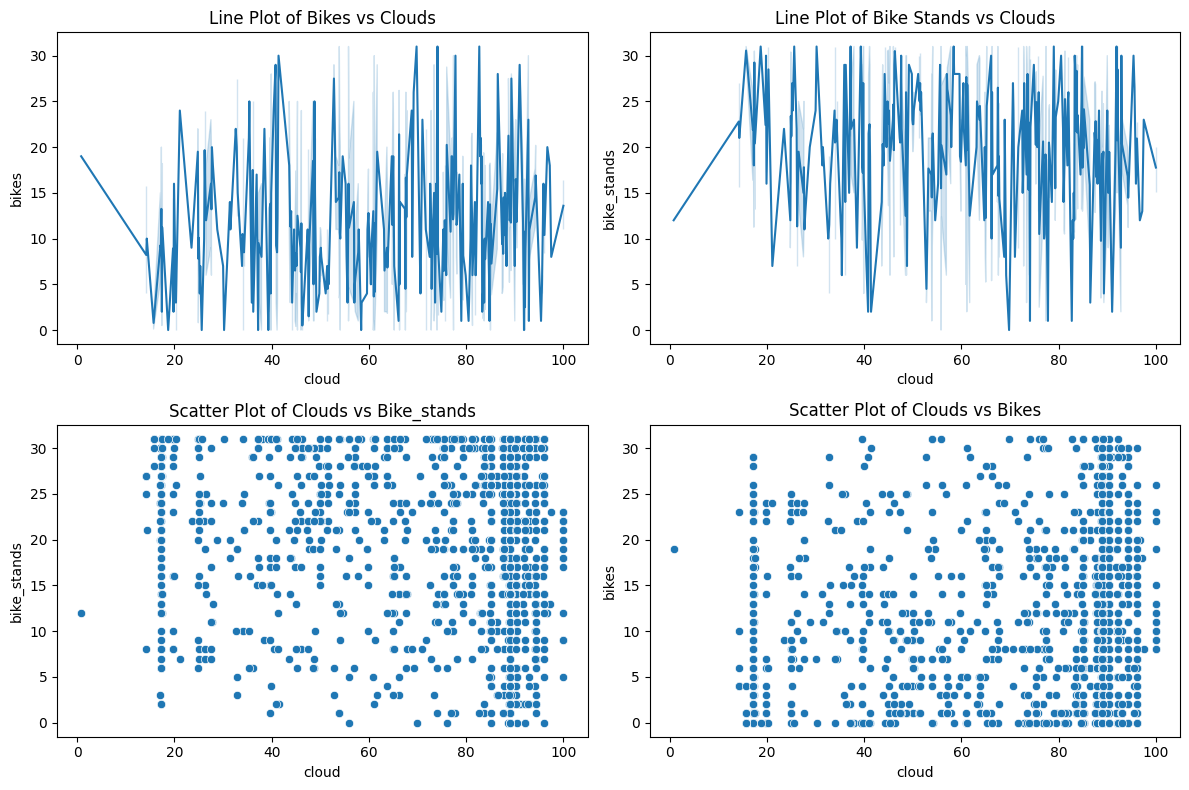

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='cloud', y='bikes')
plt.title('Line Plot of Bikes vs Clouds')

plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='cloud', y='bike_stands')
plt.title('Line Plot of Bike Stands vs Clouds')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='cloud', y='bike_stands')
plt.title('Scatter Plot of Clouds vs Bike_stands')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='cloud', y='bikes')
plt.title('Scatter Plot of Clouds vs Bikes')

plt.tight_layout()
plt.show()

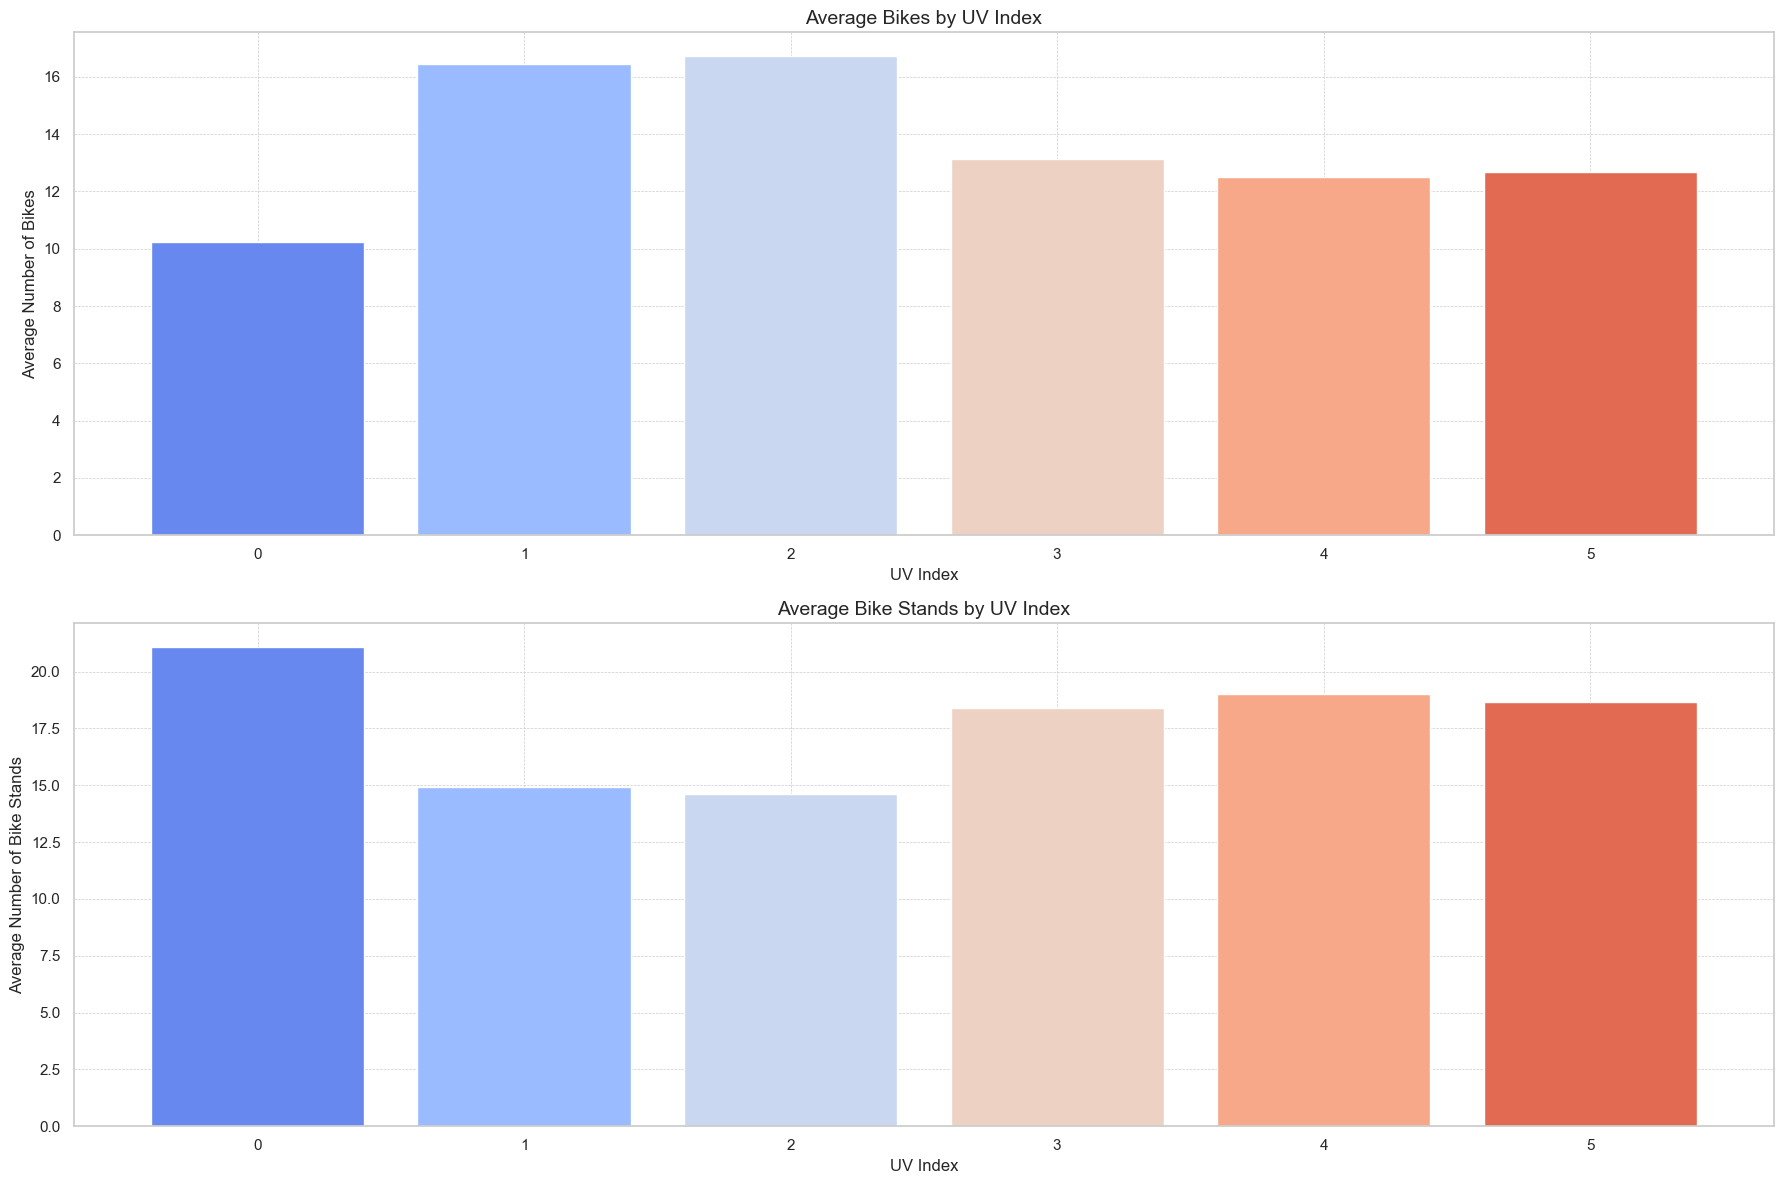

In [36]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(18, 12))

uv_bikes_group = df.groupby('uv')['bikes'].mean().reset_index()
colors = sns.color_palette('coolwarm', len(uv_bikes_group))
axs[0].bar(uv_bikes_group['uv'], uv_bikes_group['bikes'], color=colors)
axs[0].set_title('Average Bikes by UV Index', fontsize=14)
axs[0].set_xlabel('UV Index', fontsize=12)
axs[0].set_ylabel('Average Number of Bikes', fontsize=12)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

uv_bike_stands_group = df.groupby('uv')['bike_stands'].mean().reset_index()
colors = sns.color_palette('coolwarm', len(uv_bike_stands_group))
axs[1].bar(uv_bike_stands_group['uv'], uv_bike_stands_group['bike_stands'], color=colors)
axs[1].set_title('Average Bike Stands by UV Index', fontsize=14)
axs[1].set_xlabel('UV Index', fontsize=12)
axs[1].set_ylabel('Average Number of Bike Stands', fontsize=12)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()